# 제4장 비정형 데이터 마이닝

## 제 2절 사회연결망 분석

### 1. 사회연결망 분석 정의
#### 가. SNA 정의

- 사회연결망 분석( Social network analysis )은 개인과 집단들 간의 관계를 노드와 링크로서 모델링해 그것의 위상구조와 확산 및 진화과정을 계량적으로 분석하는 방법론 
- 사화연결망 분석방법에는 
    - 집합론적인 방법
    - 그래프 이론에 의한 방법
    - 행렬을 이용한 방법

##### 1) 집합론적 방법

- 객체들의 집합에서 각 객체들 간의 관계를 다음과 같이 관계 쌍을 표현

##### 2) 그래프 이론을 이용한 방법 

![](data_03.jpg)

##### 3) 행렬을 이용한 방법

![](data_04.jpg)

- 연결정도 중심성( degree centrality )
    - 한 노드에 직접적으로 연결된 노드들의 합을 계산하고, 한 노드의 중심성을 측정하는 방법.
    - 연결된 노드의 수가 많을수록 연결정도 중심성이 높음.
    
    
- 근접 중심성( closeness centrality )
    - 각 노드간의 거리를 중심성을 측정하는 방법으로, 연결정도 중심성과는 달리 간접적으로 연결된 모든 노드 간의 거리를 합산해 중심성을 측정
    - 근접 중심성은 한 노드로부터 다른 노드에 도달하기까지 필요한 최소 단계의 합으로 정의하고 근접 중심성이 높을수록 네트워크의 중앙에 위치하게 됨.
    
    
- 매개 중심성( betweenness centrality )
    - 네트워크 내에서 한 노드가 담당하는 매개자 혹은 중재자 역할의 정도로 중심성을 측정하는 방법
    
    
- 위세 중심성( eigenvector centrality )
    - 연결된 노드의 중요성에 가중치를 둬 노드의 중심성을 측정하는 방법
    - 위세가 높은 사람들과 관계가 많을수록 자신의 위세 또한 높아짐.

### 2. R을 이용한 SNA의 활용

### 가. 단어 간 연관성을 이용한 사회연결망 분석

- 소셜네트워크 서비스중 하나인 트워터 데이터를 사용해 사회연결망 분석을 수행해보자.

In [1]:
library( tm )
library(twitteR)

api_key <- "RKCbEl0xGqfSdw1SC"
api_secret <- "Aeps3VNrrykBNYL33BLGOby5XXXVwuHTvhk"
access_token <- "829270499800776704-VyJ78FDns7XjnH"
access_token_secret <- "qyGyPMisIOPXtW00ezONqw"

setup_twitter_oauth(api_key, api_secret, access_token, access_token_secret  )

keyword <- "bigdata"
bigdata.tw <- searchTwitter( keyword, since='2017-02-01', n=1000, lang='en' )

bigdata.df <- twListToDF( bigdata.tw )
bigdata.text <- bigdata.df$text

my.corpus <- Corpus( VectorSource(bigdata.text) )
my.corpus.new <- tm_map( my.corpus, stripWhitespace )
my.corpus.new <- tm_map( my.corpus.new, content_transformer(gsub),  pattern='@\\S*', replacement='' )
my.corpus.new <- tm_map( my.corpus.new, content_transformer(gsub),  pattern='http\\S*', replacement='' )
my.corpus.new <- tm_map( my.corpus.new, removePunctuation )
my.corpus.new <- tm_map( my.corpus.new, content_transformer(tolower)  )
mystopword <- c( stopwords('en'), 'rt', 'via', 'even' )
my.corpus.new <- tm_map( my.corpus.new, removeWords, mystopword )
my.corpus.new  <- tm_map( my.corpus.new, stemDocument )

my.TDM <- TermDocumentMatrix( my.corpus.new )
my.TDM.m <- as.matrix(my.TDM)

Warning message:
: package 'tm' was built under R version 3.3.2Loading required package: NLP
Warning message:
: package 'NLP' was built under R version 3.3.2Warning message:
: package 'twitteR' was built under R version 3.3.2

[1] "Using direct authentication"


In [2]:
dim( my.TDM.m )

[1] 1425 1000

- 빈도수가 20 이상인 단어들로 이루어진 데이터만 추출함

In [3]:
term.freq <- sort( rowSums(my.TDM.m), decreasing=T ) 
my.Term <- my.TDM.m[ rownames(my.TDM.m) %in% names( term.freq[ term.freq > 20 ] ) ,   ]
my.Term[1:10, 300:305]

,300,301,302,303,304,305
2017,0,0,0,0,0,0
abdsc,0,0,0,0,0,0
amp,0,0,0,0,0,0
analyt,0,0,0,0,0,0
awesom,0,0,0,0,0,0
big,0,0,0,0,0,0
bigdata,1,1,1,1,1,0
busi,0,0,0,0,0,0
businessgrowth,0,0,0,0,0,0
can,0,0,0,0,0,0


- 단어와 단어의 관계를 나타내는 메트릭스를 생성함. 

In [4]:
my.Term[ my.Term >= 1 ]  <- 1
my.Term[1:10, 300:305]

,300,301,302,303,304,305
2017,0,0,0,0,0,0
abdsc,0,0,0,0,0,0
amp,0,0,0,0,0,0
analyt,0,0,0,0,0,0
awesom,0,0,0,0,0,0
big,0,0,0,0,0,0
bigdata,1,1,1,1,1,0
busi,0,0,0,0,0,0
businessgrowth,0,0,0,0,0,0
can,0,0,0,0,0,0


In [5]:
termMatrix <- my.Term %*% t( my.Term )
termMatrix[1:10, 1:10]

,2017,abdsc,amp,analyt,awesom,big,bigdata,busi,businessgrowth,can
2017,25,0,2,6,0,2,24,1,0,0
abdsc,0,54,0,12,0,0,54,0,0,0
amp,2,0,57,10,0,4,46,5,0,0
analyt,6,12,10,165,0,30,149,5,0,13
awesom,0,0,0,0,22,0,22,0,0,0
big,2,0,4,30,0,127,116,12,0,5
bigdata,24,54,46,149,22,116,913,25,43,29
busi,1,0,5,5,0,12,25,41,0,1
businessgrowth,0,0,0,0,0,0,43,0,43,0
can,0,0,0,13,0,5,29,1,0,30


-  네트워크 그래프를 그리기 위한 igraph 패키지 설치

In [22]:
install.packages('igraph', repo='http://cran.nexr.com')

also installing the dependencies 'pkgmaker', 'registry', 'rngtools', 'gridBase', 'doParallel', 'NMF', 'irlba'



package 'pkgmaker' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'rngtools' successfully unpacked and MD5 sums checked
package 'gridBase' successfully unpacked and MD5 sums checked
package 'doParallel' successfully unpacked and MD5 sums checked
package 'NMF' successfully unpacked and MD5 sums checked
package 'irlba' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\RtmpuAWqCu\downloaded_packages


In [6]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



- termMatrix 데이터를 이용해 그래프 생성
- 그래프의 방향성이 필요없으므로 undirected 그래프를 생성
- simplify()함수는 loop나 multiple edge를 제거해서 그래프를 단순화해줌.

In [7]:
g <- graph.adjacency( termMatrix, weight=T, mode="undirected" )
g <- simplify(g)

-  node 또는 vertex(점)에 대해서 레벨과 연결정도(degree)를 생성

In [8]:
V(g)$label <- V(g)$name
head( V(g)$label  )

[1] "2017"   "abdsc"  "amp"    "analyt" "awesom" "big"

In [9]:
V(g)$degree <- degree(g)
head( V(g)$degree  )

[1] 21  7 33 50  7 38

- 의미있는 노드 또는 점의 위치를 결정하는 함수를 실행하고 그래프를 보여줌.

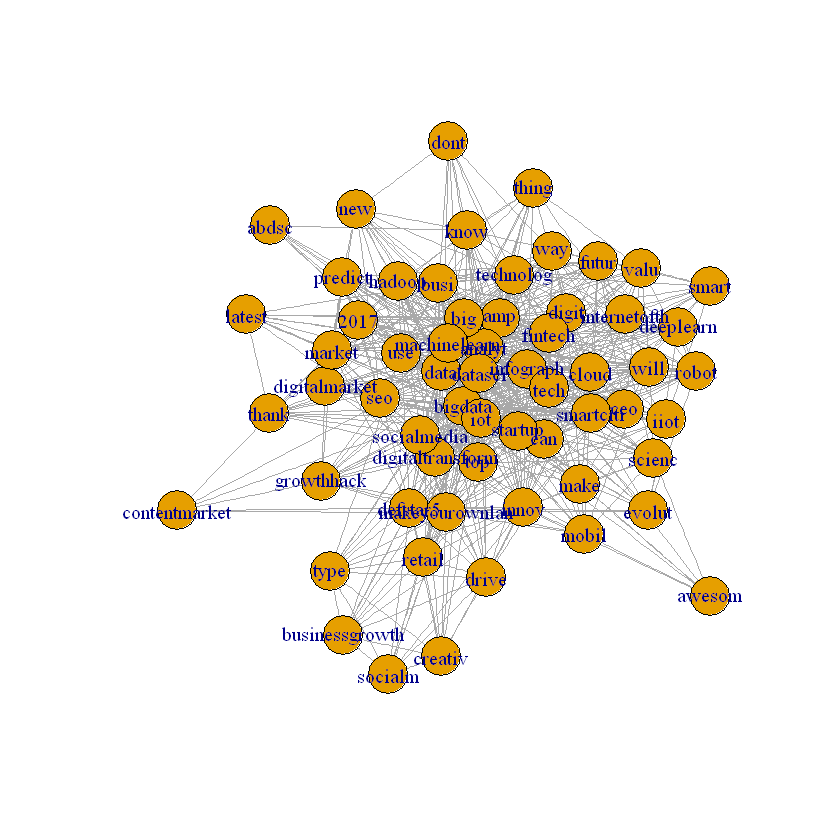

In [10]:
layout1 <- layout.fruchterman.reingold(g)
plot(g)

- 점 또는 노드의 라벨 크기와 색상, 그리고 프레임 색상을 차별화함.

In [11]:
V(g)$label.cex <- 2.2 * V(g)$degree / max( V(g)$degree ) + 0.2
V(g)$label.color <- rgb( 0, 0, 0.2, 0.8 )
V(g)$frame.color <- NA

- 연결하는 링크 또는 에지의 굵기와 색상을 차별화

In [12]:
egam <- (log(E(g)$weight+0.4))  /  max( log(E(g)$weight)+0.4 ) 
E(g)$weight <- egam
E(g)$color <- rgb(0.5, 0.5, 0, egam)

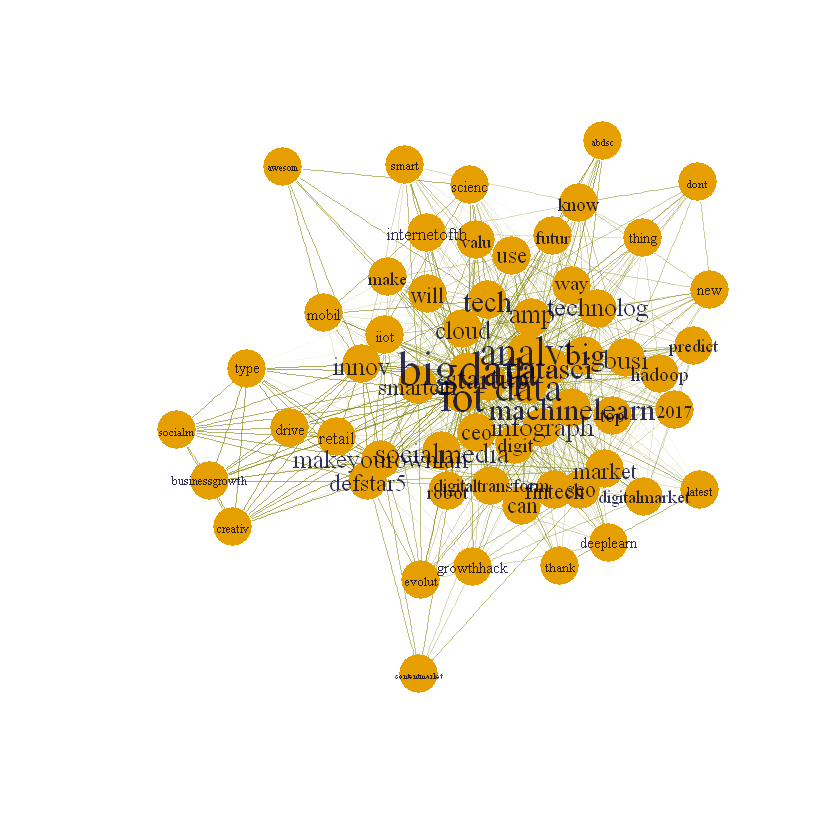

In [13]:
plot(g, layout=layout1)

### 나. 트위터 검색을 통한 사용자 간 소셜 네트워크

In [14]:
length( bigdata.tw )
length( bigdata.tw ) <- 100

[1] 1000

- 수집한 결과에서 사용자 이름을 가져옴.

In [15]:
tw.names <- sapply( bigdata.tw, function(i) i$getScreenName() )
head( tw.names )

[1] "TechNowOrNever"  "BigCommunityKL"  "mflynn2"         "pjkraeger"      
[5] "Absolutdata"     "AuDigitalHealth"

- 사용자에 따른 트위터 빈도수를 계산하고 열 이름을 지정

In [16]:
tw.names <- as.data.frame( table(tw.names) )
colnames(tw.names) <- c('user', 'tweets')
head(tw.names, 3)

,user,tweets
1,_aloksingh_,1
2,4RickStaly,1
3,7wData,1


- 노드를 추가

In [17]:
g <- graph.empty( directed=T )
g <- add.vertices(g, nrow(tw.names), name=as.character(tw.names$user), tweets=tw.names$tweets )

- 특정 사용자의 팔로어들을 가져오는 스크립트 

In [21]:
V(g)$followers <- 0

for( usr in V(g) ) {
    tuser <- getUser( V(g)$name[usr+1] )
    print( paste('Getting info on', screenName(tuser) ) )
    V(g)$followers[usr+1]  <- followersCount( tuser )
    followers.list <- getUser( V(g)$name[usr+1] )$getFollowers()
    for( tflwr in followers.list ) {
        if( screenName(tflwr)  %in% V(g)$name )
            g <- add.edges(g, c(as.vector(V(g)[name==screenName(tflwr)]), usr ) )
    }
    print('Sleep 10 min...')
    Sys.sleep(600)
}

[1] "Getting info on 4RickStaly"
[1] "Sleep 10 min..."
[1] "Getting info on 7wData"
[1] "Sleep 10 min..."
[1] "Getting info on abcbrisbane"


Warning message:
In twInterfaceObj$doAPICall(cmd, params, method, ...): Rate limit encountered & retry limit reached - returning partial results

[1] "Sleep 10 min..."
[1] "Getting info on Absolutdata"
[1] "Sleep 10 min..."
[1] "Getting info on Adduco_Tech"
[1] "Sleep 10 min..."
[1] "Getting info on alevergara78"
[1] "Sleep 10 min..."
[1] "Getting info on arcadiadata"
[1] "Sleep 10 min..."
[1] "Getting info on ArkangelScrap"
[1] "Sleep 10 min..."
[1] "Getting info on arnabch01"
[1] "Sleep 10 min..."
[1] "Getting info on AuDigitalHealth"
[1] "Sleep 10 min..."
[1] "Getting info on BDUGUK"
[1] "Sleep 10 min..."
[1] "Getting info on biconnections"
[1] "Sleep 10 min..."
[1] "Getting info on bigboardsio"
[1] "Sleep 10 min..."
[1] "Getting info on BigCommunityKL"
[1] "Sleep 10 min..."
[1] "Getting info on bigdata_network"


ERROR: Error in twInterfaceObj$doAPICall(paste("users", "show", sep = "/"), params = params, : Not Found (HTTP 404).


- 네크워크 그래프를 그리기 위해 레이아웃을 지정하고, 노드와 에지의 색상, 크기등을 알맞게 지정.

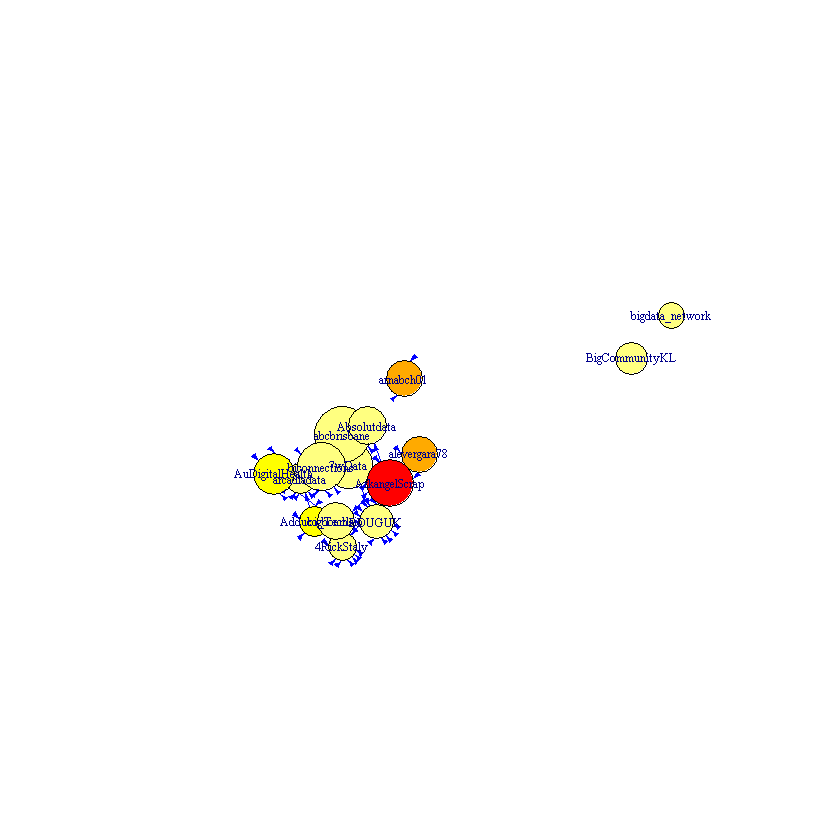

In [22]:
g$layout <- layout.fruchterman.reingold(g)
V(g)$size <- log( V(g)$followers )  * 1.8
V(g)$label <- V(g)$name
V(g)$label.cex <- 0.6
tcolors <- rev( heat.colors( max(V(g)$tweets) )  ) 
V(g)$color <- tcolors[ V(g)$tweets ]
E(g)$arrow.size <- 0.3
E(g)$curved <- FALSE
E(g)$color <- 'blue'
plot(g)